# **Dominant Color Extraction**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.cluster import KMeans

In [2]:
img = cv2.imread('dog.jpeg')
img.shape

(224, 225, 3)

In [3]:
def plot(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (100, 100))
  plt.imshow(img)
  plt.show()

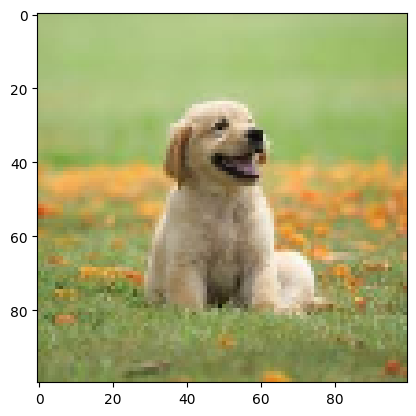

In [4]:
plot(img)

In [5]:
X = img.reshape((-1,3))
X.shape

(50400, 3)

## **KMeans-Model**

In [6]:
k = 10

In [8]:
model = KMeans(n_clusters=k)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [9]:
centroids = model.cluster_centers_
centroids

array([[ 95.17045607, 149.9659626 , 151.30808556],
       [140.35885886, 173.67817818, 191.02052052],
       [ 62.39746159, 104.89679359, 113.58817635],
       [128.61949105, 196.30215943, 173.06301678],
       [ 30.37114673,  48.47472256,  59.0567201 ],
       [ 93.34703196, 173.61670696, 219.66532366],
       [194.78220682, 220.31253611, 234.26920855],
       [ 77.81492335, 135.98951758, 129.36417944],
       [104.34275053, 181.30103945, 157.81929638],
       [ 70.67987487, 147.30795968, 192.84497741]])

In [10]:
colors = np.array(centroids, dtype='uint8')
colors

array([[ 95, 149, 151],
       [140, 173, 191],
       [ 62, 104, 113],
       [128, 196, 173],
       [ 30,  48,  59],
       [ 93, 173, 219],
       [194, 220, 234],
       [ 77, 135, 129],
       [104, 181, 157],
       [ 70, 147, 192]], dtype=uint8)

In [11]:
def plotColor(colors):
  i=1
  for color in colors:
    print(color)
    plt.subplot(1,k,i)
    i+=1
    plt.axis(False)
    mat = np.zeros((100,100,3), dtype='uint8')
    mat[:, :, :] = color
    plt.imshow(mat)
  plt.show()

[ 95 149 151]
[140 173 191]
[ 62 104 113]
[128 196 173]
[30 48 59]
[ 93 173 219]
[194 220 234]
[ 77 135 129]
[104 181 157]
[ 70 147 192]


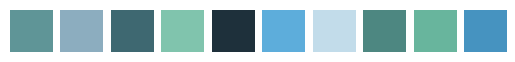

In [12]:
plotColor(colors)

## **Image Segmentation**
- Basic segmentation based upon similar color regions
- Segmentation partitions an image into regions
- Having similar visual appearance corresponding to parts of objects

In [13]:
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([ 7433,  2006,  2994, 12457,   811,  3718,  1735,  8862,  7507,
         2877]))

In [14]:
model.labels_.shape

(50400,)

In [15]:
newImg = np.zeros((X.shape), dtype='uint8')
newImg.shape

(50400, 3)

In [16]:
def segment(img):
  n = img.shape[0]
  for i in range(n):
    img[i] = colors[model.labels_[i]]
  return img

In [17]:
newImg = segment(newImg)

In [18]:
newImg = newImg.reshape(img.shape)

In [19]:
img.shape

(224, 225, 3)

In [20]:
newImg.shape

(224, 225, 3)

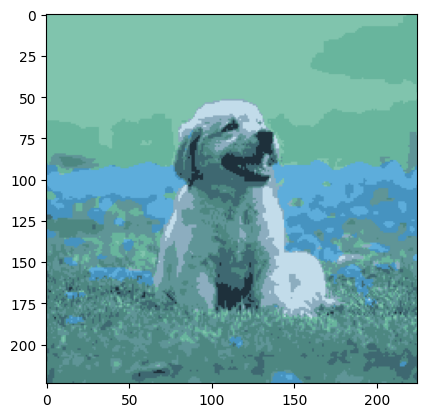

In [21]:
plt.imshow(newImg)
plt.show()